# Analysis of radial wavefunctions

In [1]:
#!/usr/bin/env ipython

from numpy import *
from matplotlib.pyplot import *

In [2]:
# path where wavefunctions are found:
p0 = 'develop_radial_BdG/run_tmat_newsolver/'

## plot source terms

"\nsubplot(2,2,3)\njlk2= loadtxt(p0+'rll_source_jlk2_atom_001_energ_001.dat')\njlk2= (jlk2[:,0]+1j*jlk2[:,1]).reshape(dim[1], dim[0])\nplot(abs(jlk2))\ntitle('abs(jlk2)')\n\nsubplot(2,2,4)\nhlk2= loadtxt(p0+'rll_source_hlk2_atom_001_energ_001.dat')\nhlk2= (hlk2[:,0]+1j*hlk2[:,1]).reshape(dim[1], dim[0])\nplot(abs(hlk))\ntitle('abs(hlk2)')\n"

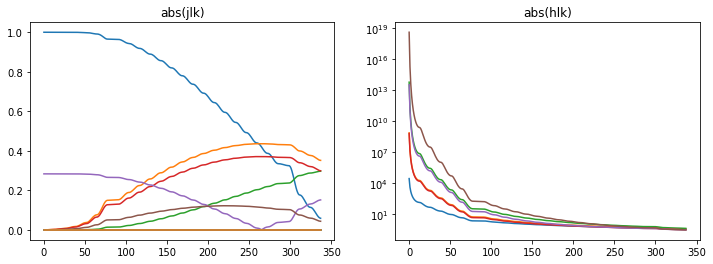

In [3]:
# source terms
dim  = [int(i.split()[0]) for i in array(open(p0+'rll_source_jlk_atom_001_energ_001.dat').readline().split('='))[[1,2]]]

figure(figsize=(12,4))

subplot(1,2,1)
jlk = loadtxt(p0+'rll_source_jlk_atom_001_energ_001.dat')
jlk = (jlk[:,0]+1j*jlk[:,1]).reshape(dim[1], dim[0])
plot(abs(jlk))
title('abs(jlk)')

subplot(1,2,2)
hlk = loadtxt(p0+'rll_source_hlk_atom_001_energ_001.dat')
hlk = (hlk[:,0]+1j*hlk[:,1]).reshape(dim[1], dim[0])
plot(abs(hlk))
title('abs(hlk)')
gca().set_yscale('log')
"""
subplot(2,2,3)
jlk2= loadtxt(p0+'rll_source_jlk2_atom_001_energ_001.dat')
jlk2= (jlk2[:,0]+1j*jlk2[:,1]).reshape(dim[1], dim[0])
plot(abs(jlk2))
title('abs(jlk2)')

subplot(2,2,4)
hlk2= loadtxt(p0+'rll_source_hlk2_atom_001_energ_001.dat')
hlk2= (hlk2[:,0]+1j*hlk2[:,1]).reshape(dim[1], dim[0])
plot(abs(hlk))
title('abs(hlk2)')
"""

Here we see that the source functions are the usual Bessel and Hankel functions

## Plot radial wavefunctions

In [4]:
# rll/sll
dim  = [int(i.split()[0]) for i in array(open(p0+'rll_atom_001_energ_001.dat').readline().split('='))[[1,2,3]]]

rll = loadtxt(p0+'rll_atom_001_energ_001.dat')
sll = loadtxt(p0+'sll_atom_001_energ_001.dat')
rll = (rll[:,0]+1j*rll[:,1]).reshape(dim[2], dim[1], dim[0])
sll = (sll[:,0]+1j*sll[:,1]).reshape(dim[2], dim[1], dim[0])

Text(0.5,0.98,'big component')

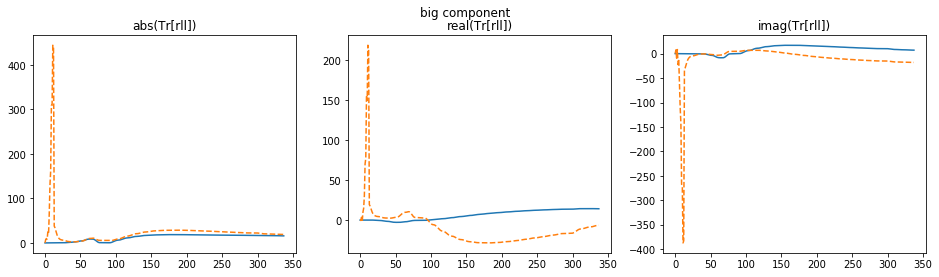

In [5]:
# take trace in lm (big component only)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= rll[j,i,i]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= sll[j,i,i]
  out.append(tmpsum)
sll_tr = array(out)

figure(figsize=(16,4))
subplot(1,3,1)
plot(abs(rll_tr))
plot(abs(sll_tr), '--')
title('abs(Tr[rll])')
subplot(1,3,2)
plot(real(rll_tr))
plot(real(sll_tr), '--')
title('real(Tr[rll])')
subplot(1,3,3)
plot(imag(rll_tr))
plot(imag(sll_tr), '--')
title('imag(Tr[rll])')
suptitle('big component')

Text(0.5,0.98,'small component')

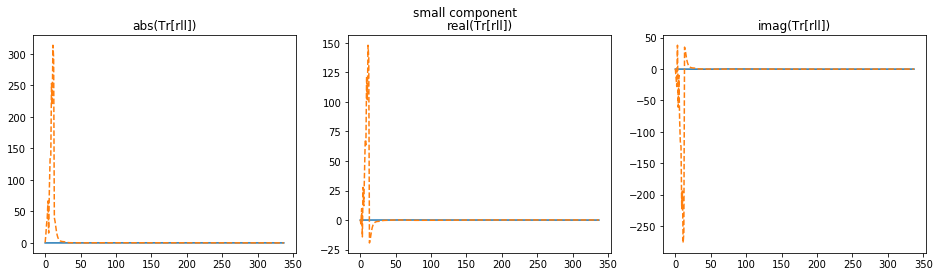

In [6]:
# take trace in lm (small component only)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= rll[j,i,i+dim[1]]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= sll[j,i,i+dim[1]]
  out.append(tmpsum)
sll_tr = array(out)

figure(figsize=(16,4))
subplot(1,3,1)
plot(abs(rll_tr))
plot(abs(sll_tr), '--')
title('abs(Tr[rll])')
subplot(1,3,2)
plot(real(rll_tr))
plot(real(sll_tr), '--')
title('real(Tr[rll])')
subplot(1,3,3)
plot(imag(rll_tr))
plot(imag(sll_tr), '--')
title('imag(Tr[rll])')
suptitle('small component')

Text(0.5,1,'imag(rll[i,i])')

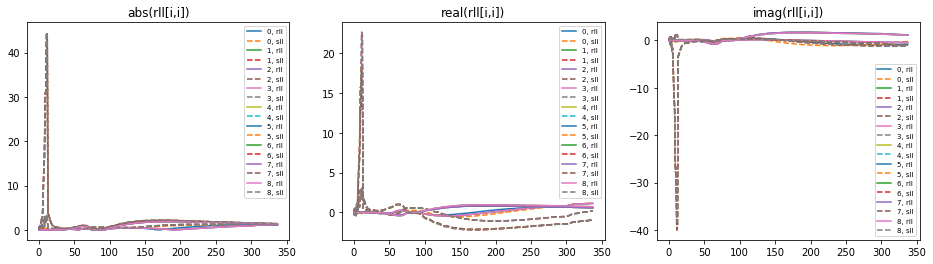

In [9]:
# some l-diagonal blocks
out = []
for j in range(len(rll)):
  for i in range(len(rll[0])):
    out.append(rll[j,i,i])
rll_ii = array(out).reshape(len(rll), len(rll[0]))
out = []
for j in range(len(rll)):
  for i in range(len(rll[0])):
    out.append(sll[j,i,i])
sll_ii = array(out).reshape(len(rll), len(rll[0]))

figure(figsize=(16,4))
subplot(1,3,1)
for i in range(9):
   plot(abs(rll_ii[:,i]), label=str(i)+', rll')
   plot(abs(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('abs(rll[i,i])')

subplot(1,3,2)
for i in range(9):
   plot(real(rll_ii[:,i]), label=str(i)+', rll')
   plot(real(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('real(rll[i,i])')

subplot(1,3,3)
for i in range(9):
   plot(imag(rll_ii[:,i]), label=str(i)+', rll')
   plot(imag(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('imag(rll[i,i])')

/Users/ruess/sourcecodes/aiida/testenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/ruess/sourcecodes/aiida/testenv/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


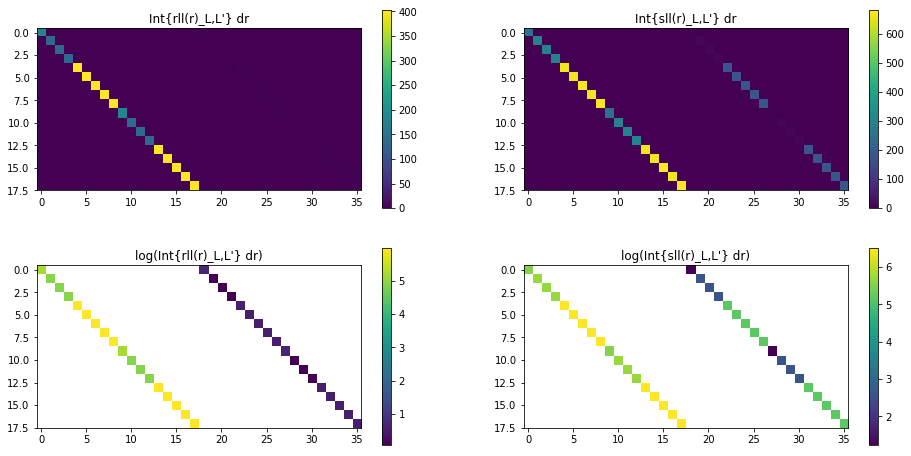

In [8]:
# sum over radial dimension:
rll_int = (sum(abs(rll), axis=0))
sll_int = (sum(abs(sll), axis=0))

figure(figsize=(16,8))

subplot(2,2,1)
imshow(rll_int)
title("Int{rll(r)_L,L'} dr")
colorbar()
subplot(2,2,2)
imshow(sll_int)
title("Int{sll(r)_L,L'} dr")
colorbar()

rll_int = log(sum(abs(rll), axis=0))
sll_int = log(sum(abs(sll), axis=0))
subplot(2,2,3)
imshow(rll_int)
title("log(Int{rll(r)_L,L'} dr)")
colorbar()
subplot(2,2,4)
imshow(sll_int)
title("log(Int{sll(r)_L,L'} dr)")
colorbar()

matrix structure of wavefunctions